# **Voice-Based Diagnosis of Parkinson’s Disease**

**Jida Al Mulki, Tayseer Mustapha , Zamzam Atwi**

## **Learning Outcomes**

Throughout this exercise, you will:
- Apply your new knowledge on binary classification to create a medical diagnostic model
- Perform data pre-processing and visualization
- Develop and train a logistic regression model and a neural network model using Sklearn
- Evaluate the performance of your diagnostic model using the proper metrics
 

---


## **Parkinson’s Disease**
* Parkinson's disease is a brain disorder that leads to shaking, stiffness, and difficulty with walking, balance, and coordination. 
* Parkinson's symptoms usually begin gradually and get worse over time
* As the disease progresses, people may have difficulty walking and talking


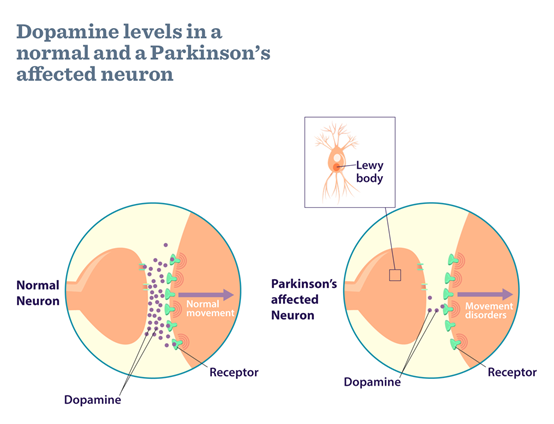

## **Dataset Description**
This dataset used in this exercise consists of biomedical voice measurements:
* **Recording number**
* **Gender** 
* **MDVP: Fo(Hz)** - Average vocal fundamental frequency
* **MDVP: Fhi(Hz)** - Maximum vocal fundamental frequency
* **MDVP: Flo(Hz)** - Minimum vocal fundamental frequency
* **MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP** - Several measures of variation in fundamental frequency
* **MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA -** Several measures of variation in amplitude
* **NHR, HNR** - Two measures of the ratio of noise to tonal components in the voice
* **RPDE, D2** - Two nonlinear dynamical complexity measures
* **DFA** - Signal fractal scaling exponent
* **spread1,spread2,PPE** - Three nonlinear measures of fundamental frequency variation
* **The health status of the subject** - (1 = **Parkinson's Disease (PD)**, 0 = **Healthy**)

# **Importing the Parkinson’s Disease Dataset**

First, let's import the libraries that we will need for this project:

* **Numpy** - for vectors manipulation and operations
* **Pandas** - for manipulating data structures and operations
* **Matplotlib** - for visualizing various types of plots
* **Seaborn** -  for data visualization and statistical graphics
* **Sklearn** - for various classification, regression and clustering algorithms 


In [3]:
# Import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

Let us start by loading the dataset and saving it as a ***dataframe*** so we can easily manipulate the data. 

In [4]:
import pandas as pd

# Define the file path
file_path = 'C:/Users/Dell/Downloads/Parkinson_disease.xlsx'

# Import the data into a dataframe 
data = pd.read_excel(file_path)

# Display the dataframe
data.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,status
0,1,1.0,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,2,0.0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
2,3,1.0,0.76095,0.62145,0.54543,322,321,0.005991,0.000107,0.00222,...,117.2678,75.3156,32.0478,7.7060,3.1060,4.6206,12.8353,13.8300,7.7693,1
3,4,0.0,0.85302,0.62247,0.54855,493,492,0.003910,0.000040,0.00075,...,1.6796,2.0474,2.8117,3.5070,3.2727,3.8415,3.9439,5.8807,38.7211,1
4,5,0.0,0.87260,0.78996,0.78026,492,491,0.003924,0.000067,0.00280,...,2.9478,2.6633,2.8015,3.5927,2.6291,3.1144,12.5950,20.0344,73.3480,1


Now that we have our dataset saved as a ***dataframe***, we are able to perform different manipulations and further explore our data. 

Let us see how many ***subjects*** (number of rows) and ***features*** ( number of columns) there are in our dataset.

In [5]:
# See the number of rows and columns in the dataset
rows = data.shape[0]
columns = data.shape[1]

print('There are {} rows and {} columns.'.format(rows,columns))

There are 271 rows and 755 columns.


Turns out that we have 271 ***patients*** and 755 ***features***.

Now, let us see some ***statistical details*** about the features inside our dataset:

In [6]:
# To see statistical details of the dataset
data.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,status
count,271.000000,270.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,...,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000
mean,136.000000,0.540741,0.741092,0.704025,0.492798,327.003690,325.734317,0.006357,0.000356,0.002419,...,27.125047,22.548272,18.280541,13.483817,11.788034,12.118990,14.738204,14.540152,32.023195,0.763838
std,78.375166,0.499263,0.174869,0.070380,0.142692,107.616965,107.854650,0.001909,0.000659,0.002806,...,43.517185,33.210631,25.868436,19.962966,17.419938,16.083236,15.787960,14.377517,34.467374,0.425509
min,1.000000,0.000000,0.041551,0.552210,0.205690,80.000000,73.000000,0.002107,0.000015,0.000210,...,1.517900,1.531700,1.582900,1.870700,1.842200,1.693300,1.861700,2.203800,2.533600,0.000000
25%,68.500000,0.000000,0.761490,0.649360,0.375520,252.000000,251.000000,0.005021,0.000052,0.000975,...,2.555850,3.662200,3.363850,3.181700,2.975500,3.120500,3.717150,3.737650,4.017500,1.000000
50%,136.000000,1.000000,0.810380,0.702000,0.494170,319.000000,318.000000,0.006030,0.000081,0.001510,...,5.860300,7.381100,5.758200,4.850700,4.442600,4.882600,6.632900,7.415500,10.394900,1.000000
75%,203.500000,1.000000,0.831845,0.758160,0.597090,384.000000,383.000000,0.007506,0.000193,0.002665,...,31.236750,24.743350,21.997250,11.350600,10.217250,11.813850,20.722300,20.930800,63.585100,1.000000
max,271.000000,1.000000,0.907660,0.850700,0.849800,907.000000,905.000000,0.012966,0.003327,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.241700,62.007300,51.756300,120.317200,1.000000


# **Data Exploration and Visualization**

Let's explore our data through visualizing it. There are many ways to visualize the data and we will be focusing on: 
  * Bargraphs
  * Scatterplots
  * Boxplots

## **Bargraph**

Let us see the number of PD patients we have versus the healthy patients to further understand the dataset:

In [7]:
# See how many patients have Parkinson
data['status'].value_counts()

1    207
0     64
Name: status, dtype: int64

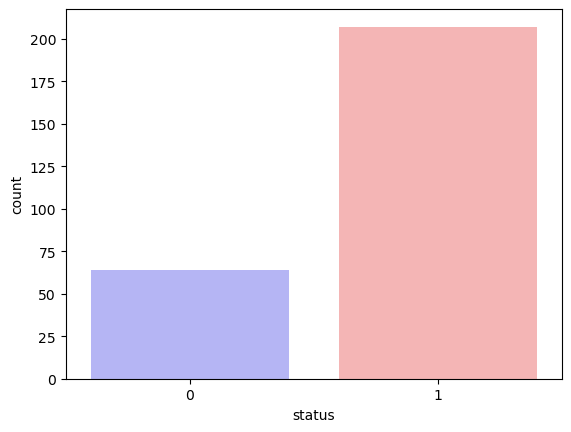

In [8]:
# Plot the results in a bargraph
sns.countplot(x="status", data=data, palette="bwr")
plt.show()

What can you say about the balance of the dataset?

The dataset is highly imbalanced, with Parkinson disease patients accounting for the majority of cases compared to normal individuals (207 PD vs 74 non-PD). The data can not be generalized until we restore the class balance of the outcome variable.

Let us plot the number of females versus males in our dataset

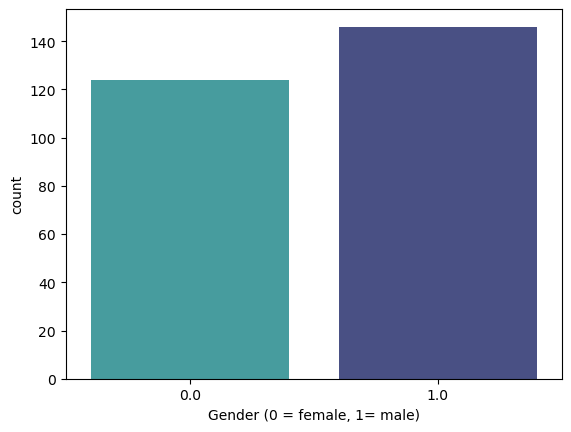

In [9]:
# Plot how many males and females we have in a bargraph
sns.countplot(x='gender', data=data, palette='mako_r')
plt.xlabel("Gender (0 = female, 1= male)")
plt.show()

Our data is ***balanced*** when it comes to the number of females and males. This means that the findings we will come up with later on are ***representative*** and can be ***generalized***.

## **Scatterplot**

Let us see how the Maximum Intensity and the Minimum Intensity of the voice signal varies between PD and healthy patients

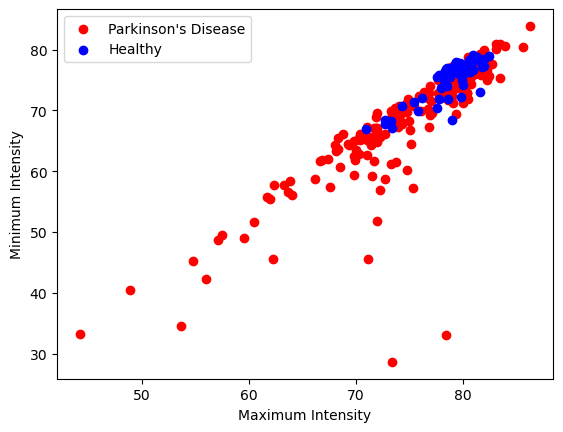

In [10]:
# Scatterplot of Min Intensity & Max Intensity in diseased and non-diseased patients 
plt.scatter(x=data[data['status'] == 1]['maxIntensity'], y=data[data['status'] == 1]['minIntensity'], c="red")
plt.scatter(x=data[data['status'] == 0]['maxIntensity'], y=data[data['status'] == 0]['minIntensity'], c="blue")
plt.legend(["Parkinson's Disease", "Healthy"])
plt.xlabel("Maximum Intensity")
plt.ylabel("Minimum Intensity")
plt.show()

## **Boxplot**

Let us see how the number of pulses of the voice signal varies between PD and healthy patients using a boxplot

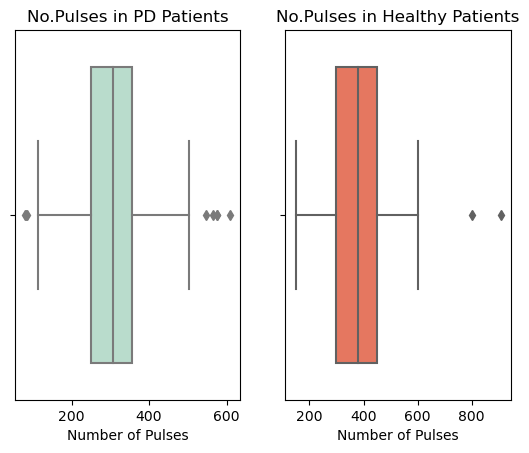

In [11]:
# Boxplot showing the number of pulses in diseased and non-diseased patients 
fig, axes = plt.subplots(1, 2)
sns.boxplot(x=data[data['status'] == 1]['numPulses'],palette='Pastel2',ax=axes[0]).set(title='No.Pulses in PD Patients', 
                                                                               xlabel='Number of Pulses')
sns.boxplot(x=data[data['status'] == 0]['numPulses'],palette='Reds',ax=axes[1]).set(title='No.Pulses in Healthy Patients', 
                                                                               xlabel='Number of Pulses')
plt.show()

These boxplots showcase the outliers or the extreme values in our dataset, while the vertical lines represent the bounds of each feature.

# **Pre-processing**

In this section, we will perform the following:
* Data Cleaning 
* Data Normalization
* Feature Selection 
* Data Splitting

## **Data Cleaning**

We need to check if there are any missing values in our dataset since the model doesn't accept missing values or NaNs. 

In [12]:
# Check how much for our data is missing 
print(data.isnull().sum())

id                           0
gender                       1
PPE                          0
DFA                          0
RPDE                         0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
status                       0
Length: 755, dtype: int64


In [13]:
# Check the total number of missing values
print(data.isnull().sum().sum())

6


In [14]:
# Count the Null Columns
null_columns = data.columns[data.isnull().any()]
# Visualize the Columns
print(data[data.isnull().any(axis=1)][null_columns].head())

     gender  ddpJitter  apq5Shimmer  apq11Shimmer  IMF_NSR_SEO  \
7       NaN    0.00731      0.10565       0.06615      0.20076   
11      1.0        NaN      0.02042       0.02589      0.18182   
14      0.0    0.00065      0.02519           NaN      0.24154   
31      1.0    0.00275          NaN       0.06309      0.29600   
268     1.0    0.00043      0.02413       0.02553      0.22418   

     mean_6th_delta_delta  
7                0.000274  
11               0.000400  
14               0.000332  
31               0.000610  
268                   NaN  


We need to deal with the missing value in the gender column by replacing the missing value with a statistical value

In [15]:
# Use the Simple Imputer to replace the NaNs in the gender coulmn by the mean of all the other values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(data[['gender']])
data['gender'] = imputer.transform(data[['gender']])

In [16]:
# Recheck the total number of missing values
print(data.isnull().sum().sum())

5


1 missing value is dealt with, 5 are left. 

We need to deal with the missing value in the rest of the numerical columns:

In [17]:
# Drop rows with missing values
data.dropna(axis=0,
    how='any',
    inplace=True)

In [18]:
# Recheck the total number of missing values
print(data.isnull().sum().sum())

0


Now that we have no missing values, we can move on to the next step. 

## **Data Normalization**

***Normalization*** is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. Normalization ensures that the features have same scale and this will help the model train faster. 

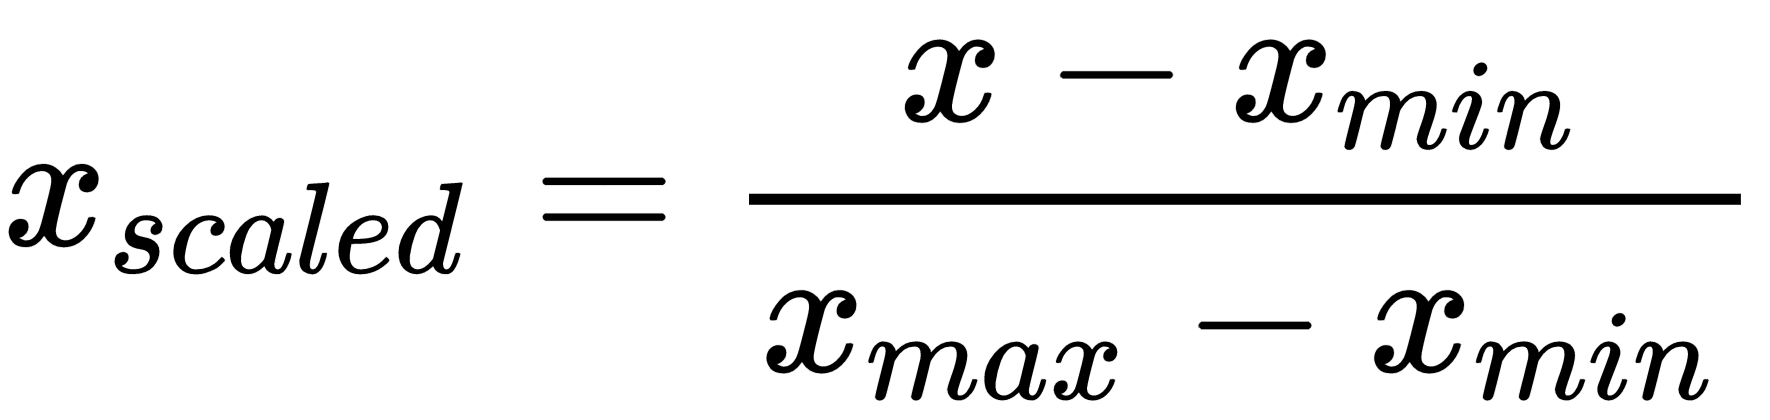

Let's use the MinMaxScaler function from sklearn.preprocessing to normalize the values we have. 

In [19]:
# Use Min Max Normalization on Dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(data) 
data.loc[:,:] = scaled_values

In [20]:
# Display the rows of the new normalized dataset
data.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,status
0,0.000000,1.0,0.936278,0.556300,0.569126,0.193470,0.199519,0.548552,0.021825,0.071532,...,0.000185,0.005515,0.019054,0.023320,0.039173,0.038704,0.012611,0.016076,0.139297,1.0
1,0.003717,0.0,0.426804,0.819156,0.600643,0.118501,0.125000,0.805881,0.050785,0.144517,...,0.009496,0.010084,0.030618,0.121288,0.028440,0.041823,0.049618,0.081958,0.012962,1.0
2,0.007435,1.0,0.830610,0.231968,0.527456,0.292624,0.298077,0.357683,0.028002,0.072985,...,0.485791,0.365666,0.253959,0.058157,0.015094,0.040914,0.182451,0.234624,0.044452,1.0
3,0.011152,0.0,0.936913,0.235385,0.532300,0.499395,0.503606,0.166057,0.007667,0.019608,...,0.000679,0.002556,0.010243,0.016308,0.017085,0.030024,0.034619,0.074202,0.307237,1.0
4,0.014870,0.0,0.959520,0.796509,0.892037,0.498186,0.502404,0.167340,0.015908,0.094045,...,0.006001,0.005608,0.010158,0.017162,0.009398,0.019862,0.178455,0.359833,0.601225,1.0


We can now see how each feature ranges from 0 till 1. 

In [21]:
# Display the statistical description of the new normalized dataset
data.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,status
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,...,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000
mean,0.502991,0.539627,0.805764,0.505176,0.448754,0.298470,0.303558,0.392072,0.104692,0.080962,...,0.107243,0.104602,0.138290,0.115009,0.118229,0.144972,0.213404,0.249227,0.250222,0.770677
std,0.287206,0.498428,0.203282,0.235646,0.221610,0.130983,0.130485,0.176611,0.200552,0.102610,...,0.183478,0.165625,0.216666,0.199137,0.207781,0.224854,0.262708,0.290437,0.292920,0.421190
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.257435,0.000000,0.830255,0.322649,0.270633,0.207981,0.213942,0.268040,0.011275,0.028504,...,0.004365,0.010520,0.014667,0.012824,0.013238,0.019905,0.030064,0.030881,0.012417,1.000000
50%,0.503717,1.000000,0.886989,0.495176,0.450024,0.286578,0.292067,0.363975,0.020255,0.047749,...,0.018134,0.029164,0.033965,0.029064,0.030201,0.043937,0.079677,0.108274,0.065565,1.000000
75%,0.750000,1.000000,0.912271,0.686924,0.608906,0.367594,0.372596,0.497961,0.055499,0.089415,...,0.120160,0.115203,0.161356,0.093486,0.100267,0.137968,0.310816,0.378078,0.520897,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Here, the table shows us that the maximum of each feature is 1 and that the minimum is 0. This tells us that we were able to correctly normalize our data. 

## **Splitting the Data**

In order to build our model, we need to split the data into ***features*** (X) and the ***outcome*** (y). 

In [22]:
# See the shape of the data
data.shape

(266, 755)

In [23]:
# Divide the data into "attributes" and "labels"
X = data.iloc[:, :-1]
y = data.iloc[:, -1] 

# **Logistic Regression Model**

Now we need to import the Logistic Regression Classifier, train test split function, and metrics to build and evaluate the model. 

In [24]:
#Import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

## **Training the Model**

In order to build and evaluate our model, we need to split the data into training and testing sets. 

In [25]:
# Split dataset in a 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We now need to train the classification model

In [26]:
# Train the model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## **Evaluating the Model**

Let us see what the trained model predicts if given new data.

In [27]:
#Predict the response for test dataset
y_pred = logreg.predict(X_test)

Let us compare what the trained model predicted and what the data actually is. 

In [28]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(10)

,Actual,Predicted
184,0.0,1.0
122,1.0,1.0
142,1.0,1.0
219,1.0,1.0
48,0.0,0.0
259,1.0,1.0
149,1.0,1.0
118,1.0,1.0
100,1.0,1.0
89,1.0,1.0


As seen above, the model seems to be performing well. 

Confusion Matrix
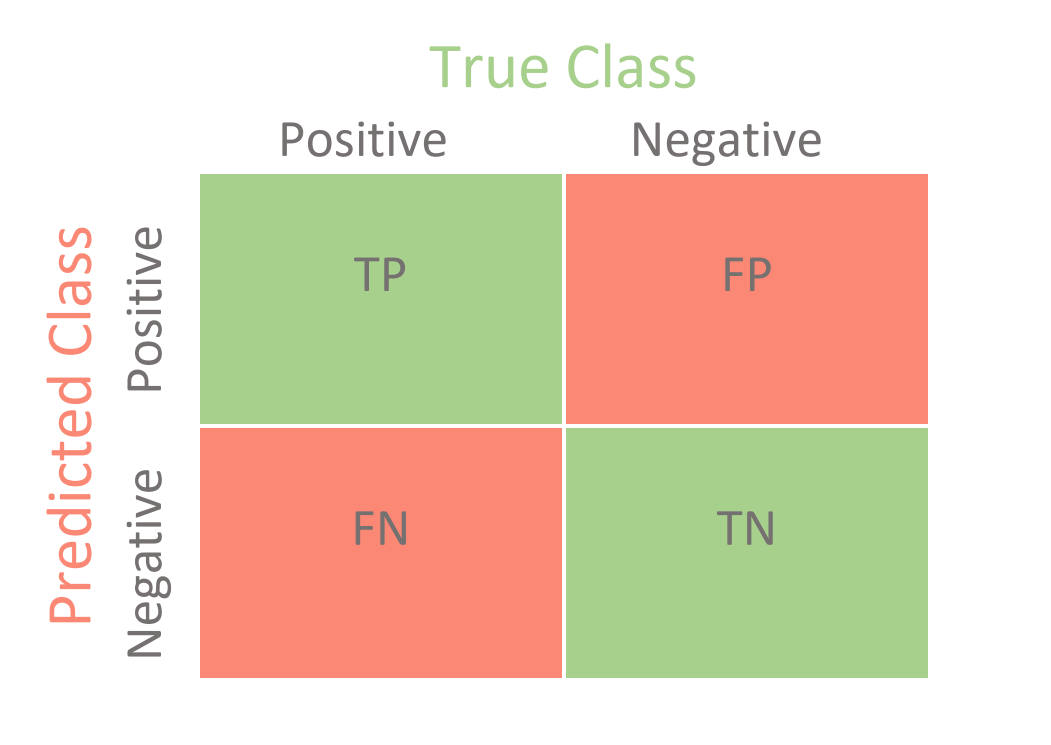

Formulas Derived from the confusion matrix


*   **Accuracy**: percentage of correct predictions for the test data
*   **Recall**:  how many of the true positives were recalled (found)
*   **Precision**: measures the model's accuracy in classifying a sample as positive


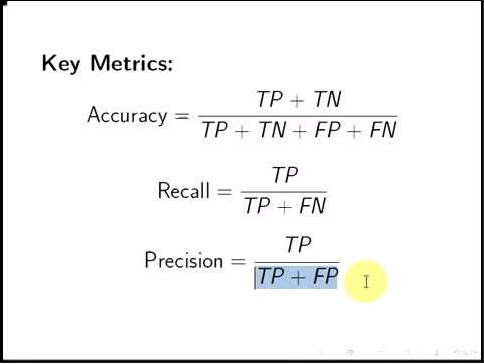

Let us see what the confusion matrix of our model is. 

In [29]:
# Plot the Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)


[[ 5  6]
 [ 2 41]]


Fill in the blanks:

*5 patients were correctly diagnosed with PD
*2 patient was  incorrectly diagnosed as healthy 
*41 patients were correctly diagnosed with healthy
*6 patients were  incorrectly diagnosed as PD 

Now let us measure the classifier's: accuracy, precision, and recall

In [30]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8518518518518519


In [31]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

Precision: 0.8723404255319149


In [32]:
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Recall: 0.9534883720930233


We can say that our diagnostic model is performing well. 

The **Area Under the Curve (AUC)** is another measure for the ability of a classifier to distinguish between classes. The higher the AUC, the better the model is at predicting 0s as 0s and 1s as 1s. Similarly, the higher the AUC, the better the model is at distinguishing between patients with the disease and the ones with no disease.

Area Under the Curve 

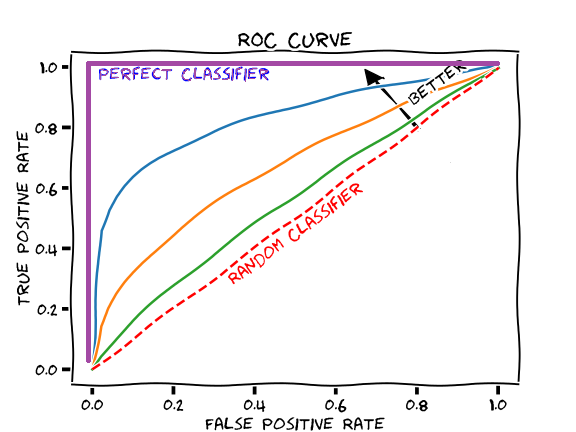

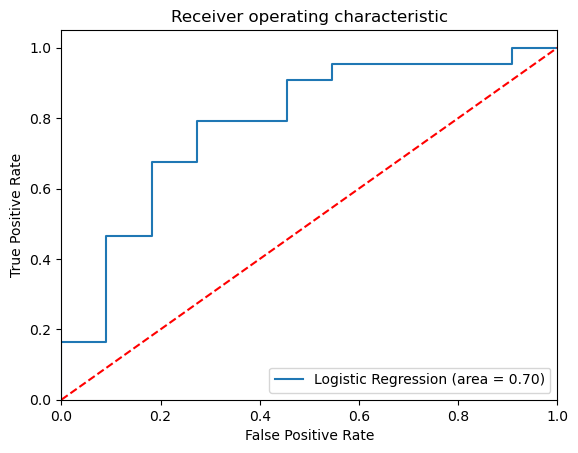

In [33]:
# Plot the ROC 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Finally, we notice that the area under the curve was equal to 0.7. This means that our model was able to perform relatively well when it comes to distinguishing between patients with the disease and the ones with no disease.

## Neural Network


Train a neural network on the training data for 100 epochs with a mini-batch size of 32 without doing any hyperameters tuning.

The architecture should be as follows:

* One input layer with 12 units
* One hidden layer with 50 units
* One dropout layer with rate = 0.4
* One output layer
* The activation of the hidden layer is a Relu
* The activation of the output layer is a Sigmoid
* The loss function is a binary cross-entropy funtion
The optimizer of this model is Admm


In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the neural network model
model = Sequential([
    Dense(12, input_shape=(X_train.shape[1],), activation='relu'),  # Input layer with 12 units
    Dense(50, activation='relu'),  # Hidden layer with 50 units and ReLU activation
    Dropout(0.4),  # Dropout layer with dropout rate of 0.4
    Dense(1, activation='sigmoid')  # Output layer with 1 unit and Sigmoid activation
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Training the Model

In [35]:
# Fit the keras model on the dataset
history = model.fit(X_train, y_train, validation_split=0.1, epochs=100, batch_size=32)

Epoch 1/100
6/6 [==============================] - 1s 40ms/step - loss: 0.6478 - accuracy: 0.6789 - val_loss: 0.5850 - val_accuracy: 0.7273
Epoch 2/100
6/6 [==============================] - 0s 7ms/step - loss: 0.5523 - accuracy: 0.7684 - val_loss: 0.5635 - val_accuracy: 0.7273
Epoch 3/100
6/6 [==============================] - 0s 9ms/step - loss: 0.5378 - accuracy: 0.7737 - val_loss: 0.5451 - val_accuracy: 0.7273
Epoch 4/100
6/6 [==============================] - 0s 7ms/step - loss: 0.5253 - accuracy: 0.7684 - val_loss: 0.5263 - val_accuracy: 0.7273
Epoch 5/100
6/6 [==============================] - 0s 9ms/step - loss: 0.4985 - accuracy: 0.7895 - val_loss: 0.5023 - val_accuracy: 0.7273
Epoch 6/100
6/6 [==============================] - 0s 8ms/step - loss: 0.5062 - accuracy: 0.7737 - val_loss: 0.4803 - val_accuracy: 0.7273
Epoch 7/100
6/6 [==============================] - 0s 8ms/step - loss: 0.4714 - accuracy: 0.7842 - val_loss: 0.4672 - val_accuracy: 0.7727
Epoch 8/100
6/6 [=========

Plot the Learning Curve of the Neural Network.

Is this a case of high bias or variance?

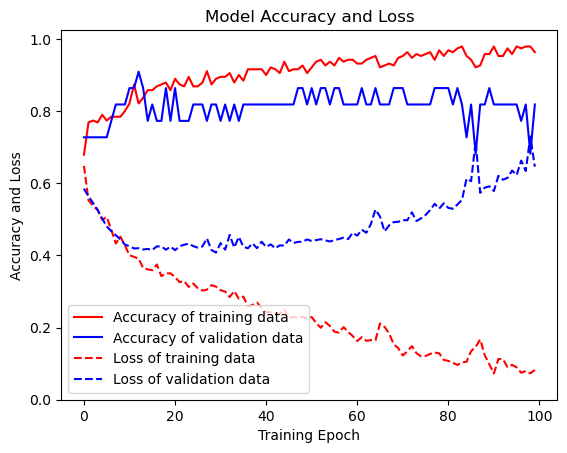

In [36]:
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

This a case of high variance (Overfitting)
The training curve shows good performance on the training set (low training error), while the validation curve shows a performance gap compared to the training curve, indicating that the model is not generalizing well to unseen data.

### Evaluating the Model

In [37]:
from sklearn.metrics import accuracy_score, f1_score

# Make predictions using the trained model
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)

f1 =f1_score(y_test, y_pred)
print('F1 Score: %f' % f1)

2/2 [==============================] - 0s 3ms/step
Accuracy: 0.870370
F1 Score: 0.921348
